In [1]:
#import seaborn as sns
from sklearn.metrics import mean_squared_error
#from datetime import date
import numpy as np 
import pandas as pd 
#import gc
import datetime
#import time
import csv
from sklearn.preprocessing import MinMaxScaler
#import os
import matplotlib.pyplot as plt
import random
import mylibs as l
from sklearn.linear_model import LinearRegression


#sns.set_palette('Set2')
%matplotlib inline

# LOAD PREPARED DATASET

In [3]:
btc_data = pd.read_csv('BTC_DATA_fin.csv', index_col=0)
btc_data.index = pd.to_datetime(btc_data.index)
btc_data.head()

BTC_Open  BTC_High  BTC_Low  BTC_Close  BTC_Volume  \
Date                                                             
2013-04-28    135.30    135.98   132.10     134.21         0.0   
2013-04-29    134.44    147.49   134.00     144.54         0.0   
2013-04-30    144.00    146.93   134.05     139.00         0.0   
2013-05-01    139.00    139.89   107.72     116.99         0.0   
2013-05-02    116.38    125.60    92.28     105.21         0.0   

            BTC_Market_Cap  Holiday  Weekend  wd_1  wd_2     ...       N_tran  \
Date                                                         ...                
2013-04-28      1488566728        0        1     0     0     ...      40986.0   
2013-04-29      1603768865        0        0     1     0     ...      50009.0   
2013-04-30      1542813125        0        0     0     1     ...      48795.0   
2013-05-01      1298954594        1        0     0     0     ...      50437.0   
2013-05-02      1168517495        0        0     0     0     ...      57278.0   

                    Diff  Block_Size        Mi_rev  Cost_tran         MA7  \
Date                                                                        
2013-04-28  8.974296e+06    0.120677  572109.88793  13.958666  121.457143   
2013-04-29  8.974296e+06    0.133635  645240.09120  12.902479  118.842857   
2013-04-30  1.007629e+07    0.176944  525692.91100  10.773500  114.237143   
2013-05-01  1.007629e+07    0.159960  442507.28800   8.773466  110.308571   
2013-05-02  1.007629e+07    0.181150  383775.10965   6.700218  109.820000   

                  SO  Momentum_14  Momentum_7  Momentum_2  
Date                                                       
2013-04-28  0.543814        19.21       18.30       -4.79  
2013-04-29  0.781319        26.56       32.24       27.55  
2013-04-30  0.384317        27.50       27.50       33.79  
2013-05-01  0.288157         2.77        3.42       19.24  
2013-05-02  0.388055       -13.55       -7.46       -7.29  

[5 rows x 29 columns]

In [4]:
btc_data.tail()

BTC_Open  BTC_High  BTC_Low  BTC_Close    BTC_Volume  \
Date                                                               
2018-11-21   4465.54   4675.73  4343.98    4602.17  6.120120e+09   
2018-11-22   4611.57   4629.64  4365.64    4365.94  4.569370e+09   
2018-11-23   4360.70   4396.42  4195.68    4347.11  4.871490e+09   
2018-11-24   4347.69   4413.09  3795.16    3880.76  4.679500e+09   
2018-11-25   3880.78   4120.87  3585.06    4009.97  6.825640e+09   

            BTC_Market_Cap  Holiday  Weekend  wd_1  wd_2     ...      \
Date                                                         ...       
2018-11-21     80020171047        0        0     0     0     ...       
2018-11-22     75919439809        1        0     0     0     ...       
2018-11-23     75598851166        0        0     0     0     ...       
2018-11-24     67495633205        0        1     0     0     ...       
2018-11-25     69749265801        0        1     0     0     ...       

              N_tran          Diff  Block_Size        Mi_rev  Cost_tran  \
Date                                                                      
2018-11-21  288450.0  6.653303e+12    1.203740  8.032834e+06  27.848272   
2018-11-22  254942.0  6.653303e+12    1.213546  6.176914e+06  24.228704   
2018-11-23  266116.0  6.653303e+12    1.218455  7.114930e+06  26.736197   
2018-11-24  275261.0  6.653303e+12    1.131097  6.892718e+06  25.040663   
2018-11-25  250017.0  6.653303e+12    0.980274  7.809122e+06  31.234365   

                    MA7        SO  Momentum_14  Momentum_7  Momentum_2  
Date                                                                    
2018-11-21  4115.114286  0.778267       848.18      344.75      255.06  
2018-11-22  4065.864286  0.001136       844.84       87.09      485.18  
2018-11-23  4053.422857  0.754359       927.17      329.84      337.14  
2018-11-24  4006.302857  0.138527       404.65     -333.91      101.63  
2018-11-25  4054.004286  0.793024       395.74     -129.91      189.25  

[5 rows x 29 columns]

# VISUALIZE TEST PERIOD

In [5]:
target_col = 'BTC_Close'
prediction_days = 90
def train_test_split(df, prediction_days):
    split_row = len(df)-prediction_days
    train_data = df.iloc[:split_row]
    test_data = df.iloc[split_row:]
    return train_data, test_data
train, test = train_test_split(btc_data, prediction_days)

In [97]:
def line_plot(line1, line2, label1=None, label2=None, title='', lw=2):
    fig, ax = plt.subplots(1, figsize=(9, 6))
    ax.plot(line1, label=label1, color='green', linewidth=lw)
    ax.plot(line2, label=label2, color='red', linewidth=lw)
    ax.set_ylabel('price [USD]', fontsize=14)
    ax.set_title(title, fontsize=18)
    ax.legend(loc='best', fontsize=18);

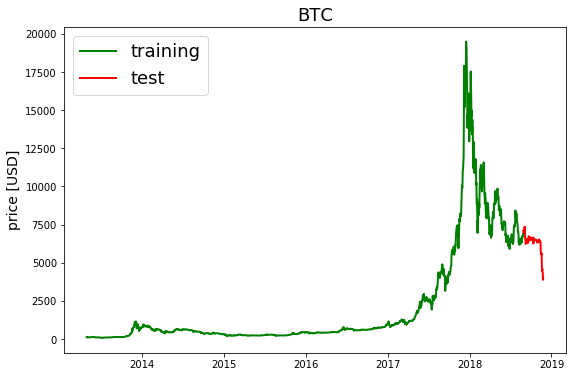

In [98]:
line_plot(train[target_col], test[target_col], 'training', 'test', title='BTC')

# TRAIN TEST SPLIT

In [8]:
#shift data
features_df = btc_data.shift(1).dropna() #.drop('BTC_Close', 1)
target_df = btc_data['BTC_Close'][1:]
prediction_days = 90

In [9]:
features_train, features_test, target_train, target_test = l.train_test_split(features_df, target_df, prediction_days)

# NORMALIZATION

In [10]:
X_min_max_scaler = MinMaxScaler()
y_min_max_scaler = MinMaxScaler()
features_train_scaled = pd.DataFrame(X_min_max_scaler.fit_transform(features_train), 
                                     columns=features_train.columns, index=features_train.index)
features_test_scaled = pd.DataFrame(X_min_max_scaler.transform(features_test),
                                    columns=features_test.columns,index=features_test.index)
target_train_scaled = y_min_max_scaler.fit_transform(target_train.values.reshape(-1, 1))
target_test_scaled = y_min_max_scaler.transform(target_test.values.reshape(-1, 1))

# LINEAR REGRESSION prediction BTC_Close on only trading days count

In [11]:
btc_data['days']=np.arange(1,len(btc_data)+1)
features_one = btc_data['days']
target_one = btc_data['BTC_Close']
prediction_days = 90

In [12]:
features_train_one, features_test_one, target_train_one, target_test_one = l.train_test_split(features_one, target_one, prediction_days)

In [13]:
y_min_max_scaler = MinMaxScaler()
target_train_scaled_one = y_min_max_scaler.fit_transform(target_train_one.values.reshape(-1, 1))
target_test_scaled_one = y_min_max_scaler.transform(target_test_one.values.reshape(-1, 1))

In [14]:
X_min_max_scaler = MinMaxScaler()
features_train_scaled_one =X_min_max_scaler.fit_transform(features_train_one.reshape(-1, 1))
features_test_scaled_one = X_min_max_scaler.transform(features_test_one.values.reshape(-1, 1))

c:\users\pff\appdata\local\programs\python\python35\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app
c:\users\pff\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [15]:
model = LinearRegression()
model.fit(features_train_scaled_one, target_train_scaled_one)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
preds = model.predict(features_test_scaled_one)

In [18]:
preds= y_min_max_scaler.inverse_transform(preds)
target_test_scaled_one=y_min_max_scaler.inverse_transform(target_test_scaled_one)
print("RMSE:"+ str(np.sqrt(mean_squared_error(target_test_scaled_one,preds))))

RMSE:732.290781026


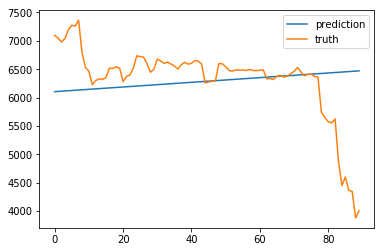

In [19]:
plt.plot(preds, label='prediction')
plt.plot(target_test_scaled_one, label='truth')
plt.legend()
plt.show()

In [20]:
btc_data.drop('days', 1, inplace=True)

# LINEAR REGRESSION prediction BTC_Close on previous day

In [48]:
features = btc_data['BTC_Close'].shift(1).dropna()
target = btc_data['BTC_Close'][1:]
prediction_days = 90

In [57]:
target_test_prev.shape

(90,)

In [53]:
features_train_prev, features_test_prev, target_train_prev, target_test_prev = l.train_test_split(features, target, prediction_days)

In [63]:
model = LinearRegression()
model.fit(features_train_prev.reshape(-1, 1), target_train_prev)
preds = model.predict(features_test_prev.reshape(-1, 1))
print("RMSE:"+ str(np.sqrt(mean_squared_error(target_test_prev,preds))))

RMSE:166.88634209


c:\users\pff\appdata\local\programs\python\python35\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app
c:\users\pff\appdata\local\programs\python\python35\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  app.launch_new_instance()


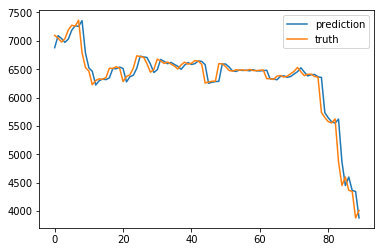

In [65]:
plt.plot(preds, label='prediction')
plt.plot(target_test_prev.values, label='truth')
plt.legend()
plt.show()

# LINEAR REGRESSION (unscaled, unwindowed data)

In [66]:
model = LinearRegression()
model.fit(features_train, target_train)
preds = model.predict(features_test)
print("RMSE:"+ str(np.sqrt(mean_squared_error(target_test,preds))))

RMSE:111.292057561


In [67]:
plt.plot(preds, label='prediction')
plt.plot(target_test.values, label='truth')
plt.legend()
plt.show()

In [68]:
model.coef_

array([ -4.27199261e-02,   4.56952128e-02,  -9.19876609e-02,
         7.23293298e-01,  -6.94273783e-09,   5.87594828e-09,
        -5.11440309e-01,  -1.60117593e+00,   2.99974153e+00,
        -7.47739461e+00,   2.63775291e+00,  -6.66658646e+00,
         1.01076626e+01,  -7.21439713e+00,   5.61322121e+00,
        -5.73631530e+00,   1.27578072e+00,   1.19042188e+00,
         3.27011270e+00,   2.35959360e-04,   3.13063464e-12,
        -5.48260994e+01,   7.46450824e-07,   4.27604506e-01,
         2.59412133e-01,  -7.19872812e+00,   6.89654154e-03,
         8.35532987e-02,  -3.87560168e-01])

# LINEAR REGRESSION (scaled, unwindowed data)

In [69]:
model = LinearRegression()
model.fit(features_train_scaled, target_train_scaled)
preds = model.predict(features_test_scaled)

In [70]:
preds= y_min_max_scaler.inverse_transform(preds)
target_test_scaled=y_min_max_scaler.inverse_transform(target_test_scaled)
print("RMSE:"+ str(np.sqrt(mean_squared_error(target_test_scaled,preds))))

RMSE:111.291909598


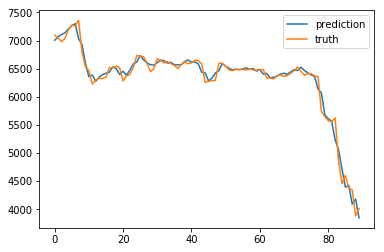

In [71]:
plt.plot(preds, label='prediction')
plt.plot(target_test_scaled, label='truth')
plt.legend()
plt.show()

# LINEAR REGRESSION (unscaled, windowed data)

In [74]:
features_df = btc_data.drop('BTC_Close', 1)
target_df = btc_data['BTC_Close']
prediction_days = 90

In [75]:
features_train, features_test, target_train, target_test = l.train_test_split(features_df, target_df, prediction_days)

In [76]:
window_len=10
def window_data(df, window_len=window_len):
    window_data = []
    for i in range(len(df) - window_len):
        tmp = df[i: (i + window_len)].copy()
        window_data.append(tmp.values)
    return np.array(window_data)

In [77]:
X_train = window_data(features_train, window_len=window_len)
X_test = window_data(features_test, window_len=window_len)
    
y_train = target_train[window_len:]
y_test = target_test[window_len:]

In [78]:
target_train.shape

(1947,)

In [79]:
linearregression = LinearRegression()
linearregression.fit(np.array([X_train[i][window_len-1] for i in range(X_train.shape[0])]),y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [80]:
preds = linearregression.predict([X_test[i][window_len-1] for i in range(X_test.shape[0])])

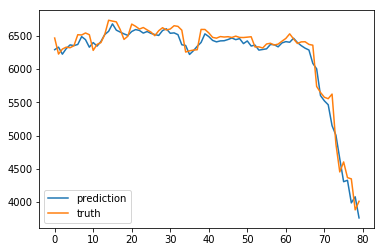

In [81]:
plt.plot(preds, label='prediction')
plt.plot(y_test.values, label='truth')
plt.legend()
plt.show()

In [82]:
np.sqrt(mean_squared_error(y_test,preds))

123.50143535010383

# OTHER BASIC MODELS (unscaled, unwindowed data)

Nonlinear Algorithms:
- k-Nearest Neighbors
- Regression Tree
- Support Vector Machine

Ensemble Algorithms:

- Bagged Decision Trees
- Random Forest
- Extra Trees
- Gradient Boosting Machine


In [83]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor


In [84]:
# create a dict of standard models to evaluate {name:object} 
def define_models(models=dict()): 
    # nonlinear models 
    models['knn'] = KNeighborsRegressor(n_neighbors=7) 
    models['dt'] = DecisionTreeRegressor() 
    models['svm'] = SVR() 
    # ensemble models 
    models['bag'] = BaggingRegressor(n_estimators=100) 
    models['rf'] = RandomForestRegressor(n_estimators=100) 
    models['et'] = ExtraTreesRegressor(n_estimators=100) 
    models['gbm'] = GradientBoostingRegressor(n_estimators=100) 
    print('Defined %d models' % len(models)) 
    return models

In [85]:
# evaluate a single model 
def evaluate_model(trainX, trainy, testX, testy, model): 
    # fit the model 
    model.fit(trainX, trainy) 
    # make predictions 
    preds = model.predict(testX) 
    # evaluate predictions errors
    rmse = np.sqrt(mean_squared_error(testy,preds)) 
    return rmse


In [86]:
# evaluate a dict of models {name:object}, returns {name:score} 
def evaluate_models(trainX, trainy, testX, testy, models): 
    results = dict() 
    for name, model in models.items(): 
        # evaluate the model 
        results[name] = evaluate_model(trainX, trainy, testX, testy, model) 
        # show process 
        print('%s: %.3f' % (name, results[name])) 
    return results

In [87]:
# print and plot the results 
def summarize_results(results): 
    # create a list of (name, mean(scores)) tuples 
    scores = [(k,v) for k,v in results.items()] 
    # sort tuples by score 
    scores = sorted(scores, key=lambda x: x[1]) 
    # reverse for descending order (e.g. for accuracy) 
    scores = list(scores)
    for name, score in scores: 
        print('Name=%s, Score=%.3f' % (name, score))


In [88]:
features_df = btc_data.shift(1).dropna() #.drop('BTC_Close', 1)
target_df = btc_data['BTC_Close'][1:]
prediction_days = 90

In [90]:
trainX, testX, trainy, testy = l.train_test_split(features_df, target_df, prediction_days)

In [91]:
# get model list 
models = define_models() 

Defined 7 models


In [92]:
# evaluate models 
results = evaluate_models(trainX, trainy, testX, testy, models) 

dt: 303.461
et: 179.242
svm: 5782.697
bag: 146.040
knn: 673.014
gbm: 156.850
rf: 149.149


In [93]:
# summarize results 
summarize_results(results)

Name=bag, Score=146.040
Name=rf, Score=149.149
Name=gbm, Score=156.850
Name=et, Score=179.242
Name=dt, Score=303.461
Name=knn, Score=673.014
Name=svm, Score=5782.697


In [94]:
m1=BaggingRegressor(n_estimators=250)

In [95]:
m1.fit(trainX, trainy) 
# make predictions 
preds = m1.predict(testX) 
# evaluate predictions errors
np.sqrt(mean_squared_error(testy,preds)) 

145.06944073496845

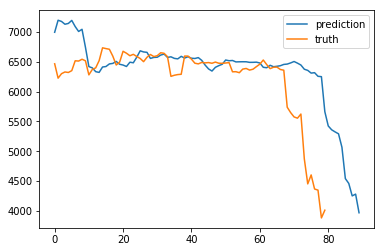

In [96]:
plt.plot(preds, label='prediction')
plt.plot(y_test.values, label='truth')
plt.legend()
plt.show()

# Applicant to Benchmark model

In [5]:
from fbprophet import Prophet

Now, let's try the prophet library and see how well it predicts. But before that, we should prepare the data. According to docs:

Prophet follows the sklearn model API. We create an instance of the Prophet class and then call its fit and predict methods. The input to Prophet is always a dataframe with two columns: ds and y. The ds (datestamp) column must contain a date or datetime (either is fine). The y column must be numeric, and represents the measurement we wish to forecast.

In [6]:
btc_data = btc_data.reset_index()

In [7]:
btc_data.head()

Date  BTC_Open  BTC_High  BTC_Low  BTC_Close  BTC_Volume  \
0 2013-04-28    135.30    135.98   132.10     134.21         0.0   
1 2013-04-29    134.44    147.49   134.00     144.54         0.0   
2 2013-04-30    144.00    146.93   134.05     139.00         0.0   
3 2013-05-01    139.00    139.89   107.72     116.99         0.0   
4 2013-05-02    116.38    125.60    92.28     105.21         0.0   

   BTC_Market_Cap  Holiday  Weekend  wd_1     ...       N_tran          Diff  \
0      1488566728        0        1     0     ...      40986.0  8.974296e+06   
1      1603768865        0        0     1     ...      50009.0  8.974296e+06   
2      1542813125        0        0     0     ...      48795.0  1.007629e+07   
3      1298954594        1        0     0     ...      50437.0  1.007629e+07   
4      1168517495        0        0     0     ...      57278.0  1.007629e+07   

   Block_Size        Mi_rev  Cost_tran         MA7        SO  Momentum_14  \
0    0.120677  572109.88793  13.958666  121.457143  0.543814        19.21   
1    0.133635  645240.09120  12.902479  118.842857  0.781319        26.56   
2    0.176944  525692.91100  10.773500  114.237143  0.384317        27.50   
3    0.159960  442507.28800   8.773466  110.308571  0.288157         2.77   
4    0.181150  383775.10965   6.700218  109.820000  0.388055       -13.55   

   Momentum_7  Momentum_2  
0       18.30       -4.79  
1       32.24       27.55  
2       27.50       33.79  
3        3.42       19.24  
4       -7.46       -7.29  

[5 rows x 30 columns]

In [8]:
transactions = pd.DataFrame(btc_data)
transactions = btc_data[['Date','BTC_Close']]
transactions.columns = ['ds', 'y']

In [9]:
transactions

ds        y
0    2013-04-28   134.21
1    2013-04-29   144.54
2    2013-04-30   139.00
3    2013-05-01   116.99
4    2013-05-02   105.21
5    2013-05-03    97.75
6    2013-05-04   112.50
7    2013-05-05   115.91
8    2013-05-06   112.30
9    2013-05-07   111.50
10   2013-05-08   113.57
11   2013-05-09   112.67
12   2013-05-10   117.20
13   2013-05-11   115.24
14   2013-05-12   115.00
15   2013-05-13   117.98
16   2013-05-14   111.50
17   2013-05-15   114.22
18   2013-05-16   118.76
19   2013-05-17   123.01
20   2013-05-18   123.50
21   2013-05-19   121.99
22   2013-05-20   122.00
23   2013-05-21   122.88
24   2013-05-22   123.89
25   2013-05-23   126.70
26   2013-05-24   133.20
27   2013-05-25   131.98
28   2013-05-26   133.48
29   2013-05-27   129.74
...         ...      ...
2007 2018-10-27  6480.38
2008 2018-10-28  6486.39
2009 2018-10-29  6332.63
2010 2018-10-30  6334.27
2011 2018-10-31  6317.61
2012 2018-11-01  6377.78
2013 2018-11-02  6388.44
2014 2018-11-03  6361.26
2015 2018-11-04  6376.13
2016 2018-11-05  6419.66
2017 2018-11-06  6461.01
2018 2018-11-07  6530.14
2019 2018-11-08  6453.72
2020 2018-11-09  6385.62
2021 2018-11-10  6409.22
2022 2018-11-11  6411.27
2023 2018-11-12  6371.27
2024 2018-11-13  6359.49
2025 2018-11-14  5738.35
2026 2018-11-15  5648.03
2027 2018-11-16  5575.55
2028 2018-11-17  5554.33
2029 2018-11-18  5623.54
2030 2018-11-19  4871.49
2031 2018-11-20  4451.87
2032 2018-11-21  4602.17
2033 2018-11-22  4365.94
2034 2018-11-23  4347.11
2035 2018-11-24  3880.76
2036 2018-11-25  4009.97

[2037 rows x 2 columns]

In [10]:
m = Prophet()
m.fit(transactions)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
forecast

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds        trend  trend_lower  trend_upper   yhat_lower  \
0    2013-04-28   406.954229   406.954229   406.954229 -1011.856067   
1    2013-04-29   407.252386   407.252386   407.252386  -972.749688   
2    2013-04-30   407.550543   407.550543   407.550543  -846.583608   
3    2013-05-01   407.848700   407.848700   407.848700  -948.280858   
4    2013-05-02   408.146857   408.146857   408.146857  -916.750391   
5    2013-05-03   408.445014   408.445014   408.445014  -958.529806   
6    2013-05-04   408.743171   408.743171   408.743171 -1013.177789   
7    2013-05-05   409.041328   409.041328   409.041328  -967.917291   
8    2013-05-06   409.339485   409.339485   409.339485 -1000.111288   
9    2013-05-07   409.637642   409.637642   409.637642 -1053.289798   
10   2013-05-08   409.935799   409.935799   409.935799 -1012.541134   
11   2013-05-09   410.233956   410.233956   410.233956 -1039.590512   
12   2013-05-10   410.532113   410.532113   410.532113 -1098.914311   
13   2013-05-11   410.830270   410.830270   410.830270 -1072.128412   
14   2013-05-12   411.128427   411.128427   411.128427 -1078.576812   
15   2013-05-13   411.426584   411.426584   411.426584 -1053.424735   
16   2013-05-14   411.724741   411.724741   411.724741 -1174.306227   
17   2013-05-15   412.022898   412.022898   412.022898 -1062.936969   
18   2013-05-16   412.321055   412.321055   412.321055 -1183.396990   
19   2013-05-17   412.619212   412.619212   412.619212 -1247.857365   
20   2013-05-18   412.917369   412.917369   412.917369 -1131.597913   
21   2013-05-19   413.215526   413.215526   413.215526 -1139.444429   
22   2013-05-20   413.513683   413.513683   413.513683 -1282.642498   
23   2013-05-21   413.811840   413.811840   413.811840 -1135.283492   
24   2013-05-22   414.109997   414.109997   414.109997 -1360.674525   
25   2013-05-23   414.408154   414.408154   414.408154 -1303.681010   
26   2013-05-24   414.706311   414.706311   414.706311 -1263.324908   
27   2013-05-25   415.004468   415.004468   415.004468 -1311.135859   
28   2013-05-26   415.302625   415.302625   415.302625 -1258.514536   
29   2013-05-27   415.600782   415.600782   415.600782 -1259.929176   
...         ...          ...          ...          ...          ...   
2372 2019-10-27  6464.809157  3346.267842  9161.769351  2544.784265   
2373 2019-10-28  6461.890527  3335.815114  9164.798466  2382.801098   
2374 2019-10-29  6458.971898  3325.936002  9180.888534  2277.865424   
2375 2019-10-30  6456.053269  3316.056889  9196.978601  2465.282024   
2376 2019-10-31  6453.134639  3285.577055  9204.233631  2411.015606   
2377 2019-11-01  6450.216010  3257.641445  9208.468642  2327.903328   
2378 2019-11-02  6447.297380  3241.254260  9212.703652  2418.686867   
2379 2019-11-03  6444.378751  3225.013741  9216.938662  2361.677856   
2380 2019-11-04  6441.460121  3210.295525  9221.173673  2231.356376   
2381 2019-11-05  6438.541492  3195.577310  9225.639649  2101.528049   
2382 2019-11-06  6435.622863  3169.406220  9241.174194  2040.725003   
2383 2019-11-07  6432.704233  3142.498453  9256.708739  2318.370133   
2384 2019-11-08  6429.785604  3116.266235  9272.243283  2225.677170   
2385 2019-11-09  6426.866974  3093.943967  9286.468476  2455.448315   
2386 2019-11-10  6423.948345  3089.724792  9285.509994  2321.173414   
2387 2019-11-11  6421.029715  3074.793777  9298.781046  2364.751938   
2388 2019-11-12  6418.111086  3054.253799  9313.682859  2175.266330   
2389 2019-11-13  6415.192456  3027.923816  9328.584673  2084.388187   
2390 2019-11-14  6412.273827  2997.174942  9342.249490  2282.797692   
2391 2019-11-15  6409.355198  2969.364530  9355.868507  2171.446617   
2392 2019-11-16  6406.436568  2953.069321  9369.487524  1903.363388   
2393 2019-11-17  6403.517939  2937.571015  9378.440319  2257.803388   
2394 2019-11-18  6400.599309  2922.593120  9384.191953  2168.762697   
2395 2019-11-19  6397.680680  2907.615225  9389.943587  2176.140290   
2396 2019-11-20  6394.762050  2892.65

In [11]:
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode()
py.iplot([
    go.Scatter(x=transactions['ds'], y=transactions['y'], name='y'),
    go.Scatter(x=forecast['ds'], y=forecast['yhat'], name='yhat'),
    go.Scatter(x=forecast['ds'], y=forecast['yhat_upper'], fill='tonexty', mode='none', name='upper'),
    go.Scatter(x=forecast['ds'], y=forecast['yhat_lower'], fill='tonexty', mode='none', name='lower'),
    go.Scatter(x=forecast['ds'], y=forecast['trend'], name='Trend')
])

In [12]:
print('RMSE: %f' % np.sqrt(np.mean((forecast.loc[:2037, 'yhat']-transactions['y'])**2)) )

RMSE: 1195.566379


In [13]:
m = Prophet(changepoint_prior_scale=0.5)
m.fit(transactions)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [14]:
# Calculate root mean squared error.
print('RMSE: %f' % np.sqrt(np.mean((forecast.loc[:2037, 'yhat']-transactions['y'])**2)) )
py.iplot([
    go.Scatter(x=transactions['ds'], y=transactions['y'], name='y'),
    go.Scatter(x=forecast['ds'], y=forecast['yhat'], name='yhat'),
    go.Scatter(x=forecast['ds'], y=forecast['yhat_upper'], fill='tonexty', mode='none', name='upper'),
    go.Scatter(x=forecast['ds'], y=forecast['yhat_lower'], fill='tonexty', mode='none', name='lower'),
    go.Scatter(x=forecast['ds'], y=forecast['trend'], name='Trend')
])

RMSE: 852.248806
